In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('tkt_by_time.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ISSUE_YR       280 non-null    int64
 1   ISSUE_WEEK     280 non-null    int64
 2   TOTAL_TICKETS  280 non-null    int64
dtypes: int64(3)
memory usage: 6.7 KB


In [58]:
df[df.ISSUE_WEEK == 53]

,ISSUE_YR,ISSUE_WEEK,TOTAL_TICKETS
208,2020,53,6465688
261,2021,53,3803814


In [59]:
df.iloc[207, 2] = df.iloc[207, 2] + df.iloc[208, 2] 
df.iloc[260, 2] = df.iloc[260, 2] + df.iloc[261, 2]

In [60]:
df.drop(index=[208,261], axis=0, inplace=True)

In [61]:
def to_time(y):
    return 52*(y-2017)

In [62]:
df['time'] = df['ISSUE_WEEK']+df['ISSUE_YR'].apply(to_time)

In [63]:
df.time

0        1
1        2
2        3
3        4
4        5
      ... 
275    274
276    275
277    276
278    277
279    278
Name: time, Length: 278, dtype: int64

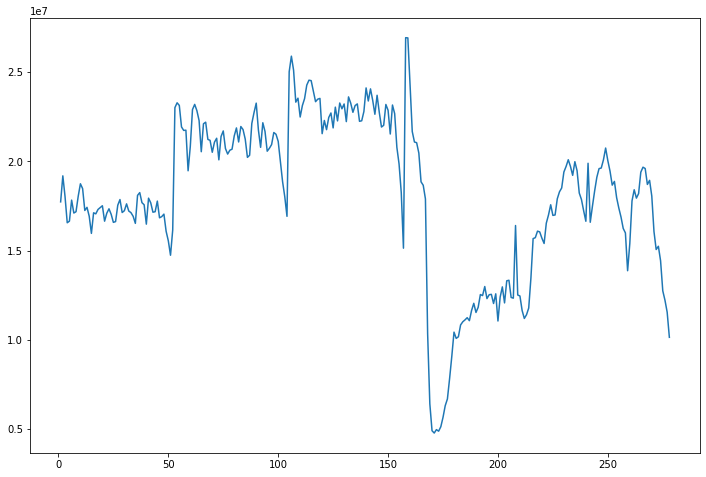

In [67]:
plt.figure(figsize = (12,8))
plt.plot(df.time, df.TOTAL_TICKETS)
plt.show()

In [68]:
df

,ISSUE_YR,ISSUE_WEEK,TOTAL_TICKETS,time
0,2017,1,17725398,1
1,2017,2,19181615,2
2,2017,3,18026194,3
3,2017,4,16554652,4
4,2017,5,16647429,5
...,...,...,...,...
275,2022,14,14429603,274
276,2022,15,12745515,275
277,2022,16,12218615,276
278,2022,17,11550258,277


In [71]:
df_a = pd.read_csv('Covid_all.csv')

In [78]:
df_f = pd.read_csv('Fuel_Price.csv')

In [79]:
df_f

,ISSUE_YR,ISSUE_WEEK,Fuel Price
0,2014,1,2.960
1,2014,2,2.908
2,2014,3,2.912
3,2014,4,2.941
4,2014,5,2.930
...,...,...,...
457,2022,40,3.627
458,2022,41,3.677
459,2022,42,3.459
460,2022,43,3.998


In [83]:
df_clean = df.merge(df_a, how='left', left_on=['ISSUE_YR', 'ISSUE_WEEK'], right_on=['ISSUE_YEAR', 'ISSUE_WEEK'])\
  .merge(df_f, how='left', left_on=['ISSUE_YR', 'ISSUE_WEEK'], right_on=['ISSUE_YR', 'ISSUE_WEEK']).fillna(0)\
  [['ISSUE_YR', 'ISSUE_WEEK', 'time', 'stringency_index', 'Fuel Price', 'TOTAL_TICKETS']]
df_clean.rename(columns={'stringency_index': 'covid_policy'}, inplace=True)

In [84]:
df_clean

,ISSUE_YR,ISSUE_WEEK,time,covid_policy,Fuel Price,TOTAL_TICKETS
0,2017,1,1,0.000000,1.539,17725398
1,2017,2,2,0.000000,1.506,19181615
2,2017,3,3,0.000000,1.505,18026194
3,2017,4,4,0.000000,1.513,16554652
4,2017,5,5,0.000000,1.518,16647429
...,...,...,...,...,...,...
273,2022,14,274,23.807611,3.561,14429603
274,2022,15,275,23.109555,3.604,12745515
275,2022,16,276,22.245518,3.859,12218615
276,2022,17,277,21.638946,4.626,11550258


In [86]:
df_clean.to_csv('tkt_time_clean.csv', index=False)

In [4]:
df2 = pd.read_csv('tkt_all_segments.csv')

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11754 entries, 0 to 11753
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ISSUE_YR       11754 non-null  int64 
 1   ISSUE_WEEK     11754 non-null  int64 
 2   TRAVELER_TYPE  11754 non-null  object
 3   GEO_SEGMENTS   11754 non-null  object
 4   TOTAL_TICKETS  11754 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 459.3+ KB


In [186]:
y = list((2020, 2021))
t = list(('Business', 'Leisure'))
g = list(df2['GEO_SEGMENTS'].unique().reshape(1,-1)[0])

In [187]:
for a in y:
    for b in t:
        for c in g:
            index = df2[(df2.TRAVELER_TYPE == b) & (df2.GEO_SEGMENTS == c)\
                        & (df2.ISSUE_WEEK == 52) & (df2.ISSUE_YR == a)].index[0]
            num = df2[(df2.TRAVELER_TYPE == b) & (df2.GEO_SEGMENTS == c)\
                      & (df2.ISSUE_WEEK == 53) & (df2.ISSUE_YR == a)].TOTAL_TICKETS
            index2 = df2[(df2.TRAVELER_TYPE == b) & (df2.GEO_SEGMENTS == c)\
                      & (df2.ISSUE_WEEK == 53) & (df2.ISSUE_YR == a)].index[0]
            df2.iloc[index,4] = df2.iloc[index,4] + num
            df2.drop(index=index2, axis=0, inplace=True)

In [192]:
df2['time'] = df2['ISSUE_WEEK']+df2['ISSUE_YR'].apply(to_time)

In [195]:
df2.to_csv('tkt_country_clean.csv')

In [196]:
df_c = pd.read_csv('Covid_Policy.csv')

In [209]:
df2

,ISSUE_YR,ISSUE_WEEK,TRAVELER_TYPE,GEO_SEGMENTS,TOTAL_TICKETS,time
0,2017,1,Business,AU_domestic,6207,1
1,2017,1,Business,AU_international,10667,1
2,2017,1,Business,BR_domestic,278,1
3,2017,1,Business,BR_international,5222,1
4,2017,1,Business,CA_domestic,22759,1
...,...,...,...,...,...,...
11749,2022,18,Leisure,RU_international,28125,278
11750,2022,18,Leisure,TR_domestic,161204,278
11751,2022,18,Leisure,TR_international,107622,278
11752,2022,18,Leisure,US_domestic,3301741,278


In [197]:
df_c

,ISSUE_YEAR,ISSUE_WEEK,US_Covid,China_Covid,Brazil_Covid,Canada_Covid,Germany_Covid,Russia_Covid,United Kingdom_Covid,Australia_Covid,France_Covid,Turkey_Covid,Other_Covid
0,2020,4,0.000000,46.762000,0.000000,2.780,0.000000,0.000000,0.0000,5.560000,5.560000,0.000000,9.988846
1,2020,5,0.794286,72.024286,0.000000,2.780,5.560000,8.330000,8.3325,7.940000,5.560000,0.000000,13.220930
2,2020,6,5.560000,77.310000,0.000000,2.780,5.560000,8.330000,11.1100,19.440000,5.560000,0.000000,15.275135
3,2020,7,5.560000,75.460000,0.000000,2.780,9.524286,8.330000,11.1100,19.440000,5.560000,0.000000,14.883762
4,2020,8,5.560000,75.460000,0.000000,2.780,11.110000,8.330000,11.1100,19.440000,5.560000,0.000000,15.219821
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,2022,41,25.900000,66.200000,22.590000,5.560,23.150000,31.020000,0.0000,11.110000,11.110000,11.110000,18.621726
143,2022,42,25.881429,66.200000,22.590000,5.560,23.150000,23.880000,0.0000,11.110000,1.587143,11.110000,18.439977
144,2022,43,25.864286,66.200000,3.227143,5.560,23.150000,22.690000,0.0000,11.110000,0.000000,11.110000,18.882911
145,2022,44,3.694286,63.557143,19.362857,5.560,6.614286,6.482857,0.0000,3.174286,0.000000,1.587143,18.974014


In [227]:
g

['AU_domestic',
 'AU_international',
 'BR_domestic',
 'BR_international',
 'CA_domestic',
 'CA_international',
 'CN_domestic',
 'CN_international',
 'DE_domestic',
 'DE_international',
 'FR_domestic',
 'FR_international',
 'GB_domestic',
 'GB_international',
 'Others',
 'RU_domestic',
 'RU_international',
 'TR_domestic',
 'TR_international',
 'US_domestic',
 'US_international']

In [240]:
c = list(('Australia_Covid', 'Australia_Covid', 'Brazil_Covid', 'Brazil_Covid', 'Canada_Covid', 'Canada_Covid',
         'China_Covid', 'China_Covid', 'Germany_Covid', 'Germany_Covid', 'France_Covid', 'France_Covid',
         'United Kingdom_Covid', 'United Kingdom_Covid', 'Other_Covid', 'Russia_Covid', 'Russia_Covid',
         'Turkey_Covid', 'Turkey_Covid', 'US_Covid', 'US_Covid'))

In [367]:
o = ['a1','a2','a3','a4','a5','a6','a7','a8','a9','a10','a11','a12','a13','a14','a15','a16','a17','a18','a19','a20','a21']

In [368]:
for y, z, x in zip(g, c, o):
    globals()[x] = df2[(df2.TRAVELER_TYPE=='Business') & (df2.GEO_SEGMENTS==y)].merge(df_c[['ISSUE_YEAR', 'ISSUE_WEEK', z]]\
    ,left_on=['ISSUE_YR', 'ISSUE_WEEK'], right_on=['ISSUE_YEAR', 'ISSUE_WEEK'], how='left').fillna(0)\
    [['ISSUE_YR', 'ISSUE_WEEK', 'TRAVELER_TYPE', 'GEO_SEGMENTS', 'TOTAL_TICKETS', 'time', z]]
    globals()[x].rename(columns={z: 'covid_policy'}, inplace=True)

In [373]:
df_b1 = pd.concat([a1,a2,a3,a4,a5,a6,a7,a8,a9,a10])
df_b2 = pd.concat([a11,a12,a13,a14,a15,a16,a17,a18,a19,a20])
df_b = pd.concat([df_b1, df_b2, a21])

In [377]:
for y, z, x in zip(g, c, o):
        globals()[x] = df2[(df2.TRAVELER_TYPE=='Leisure') & (df2.GEO_SEGMENTS==y)].merge(df_c[['ISSUE_YEAR', 'ISSUE_WEEK', z]]\
        ,left_on=['ISSUE_YR', 'ISSUE_WEEK'], right_on=['ISSUE_YEAR', 'ISSUE_WEEK'], how='left').fillna(0)\
        [['ISSUE_YR', 'ISSUE_WEEK', 'TRAVELER_TYPE', 'GEO_SEGMENTS', 'TOTAL_TICKETS', 'time', z]]
        globals()[x].rename(columns={z: 'covid_policy'}, inplace=True)

In [378]:
df_l1 = pd.concat([a1,a2,a3,a4,a5,a6,a7,a8,a9,a10])
df_l2 = pd.concat([a11,a12,a13,a14,a15,a16,a17,a18,a19,a20])
df_l = pd.concat([df_l1, df_l2, a21])

In [379]:
df_country = pd.concat([df_b, df_l])

In [391]:
df_final = df_country.merge(df_f, how='left', left_on=['ISSUE_YR', 'ISSUE_WEEK'], right_on=['ISSUE_YR', 'ISSUE_WEEK'])\
.fillna(0)[['ISSUE_YR', 'ISSUE_WEEK', 'TRAVELER_TYPE', 'GEO_SEGMENTS', 'TOTAL_TICKETS', 'time', 'covid_policy', 'Fuel Price']]

In [392]:
df_final

,ISSUE_YR,ISSUE_WEEK,TRAVELER_TYPE,GEO_SEGMENTS,TOTAL_TICKETS,time,covid_policy,Fuel Price
0,2017,1,Business,AU_domestic,6207,1,0.000000,1.539
1,2017,2,Business,AU_domestic,7016,2,0.000000,1.506
2,2017,3,Business,AU_domestic,8022,3,0.000000,1.505
3,2017,4,Business,AU_domestic,7498,4,0.000000,1.513
4,2017,5,Business,AU_domestic,8255,5,0.000000,1.518
...,...,...,...,...,...,...,...,...
11665,2022,14,Leisure,US_international,700289,274,29.870000,3.561
11666,2022,15,Leisure,US_international,598771,275,29.847143,3.604
11667,2022,16,Leisure,US_international,547980,276,28.770000,3.859
11668,2022,17,Leisure,US_international,494867,277,27.957143,4.626


In [394]:
df_final.to_csv('tkt_country_clean.csv')